In [1]:
import pandas as pd
import os
data_dir = "./data"
data_path = os.path.join(data_dir,"poems.csv")
data_df = pd.read_csv(data_path)

D:\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.CSRRD7HKRKC3T3YXA7VY7TAZGLSWDKW6.gfortran-win_amd64.dll
D:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data_df.head()

,题目,朝代,作者,内容
0,赠歌者杜氏入道三首 其三,元,潘纯,云髻高梳鬓不分，扫除虚室事元君。新糊白纸屏风上，尽画蓬莱五色云。
1,七岁游法兴寺,元,胡天游,山色摇光入袖凉，松阴十丈印回廊。老僧读罢楞严咒，一殿神风柏子香。
2,新岁忆曾子白,元,陈高,经月愁闻雨，新年苦忆君。青华为客久，白发著书勤。酒共邻僧饮，蔬从野老分。何时共登眺，整屐待晴云。
3,城西虎跑寺,元,陈高,石势虎蹲伏，山形龙屈盘。寺开唐殿阁，坟掩宋衣冠。幽涧泉声细，斜阳塔影寒。近城多战鼓，栖息此中安。
4,赠章以元昆仲,元,陈高,相见谈经史，江楼坐夜阑。风声吹屋响，灯影照人寒。俗薄交游尽，时危出处难。衰年逢二妙，亦得闷怀宽。


In [3]:
from collections import Counter
import gc

## 全局高频词分析

In [4]:
data=data_df.loc[data_df['朝代'] =="唐", ['内容']][:10]
data

,内容
58259,风淅淅。夜雨连云黑。滴滴。窗外芭蕉灯下客。除非魂梦到乡国。免被关山隔。忆忆。一句枕前争忘得。
58260,别路云初起，离亭叶正飞。所嗟人异雁，不作一行归。
58261,弄玉有夫皆得道，刘纲兼室尽登仙。君能仔细窥朝露，须逐云车拜洞天。
58262,萧郎不顾凤楼人，云涩回车泪脸新。愁想蓬瀛归去路，难窥旧苑碧桃春。
58263,谪居蓬岛别瑶池，春媚烟花有所思。为爱君心能洁白，愿操箕帚奉屏帏。
58264,湖上青山今欲买，白云无主问何人。
58265,一朵花开千叶红，开时又不藉春风。若教移在香闺畔，定与佳人艳态同。
58266,不语凄凉无限情，荒阶行尽又重行。昔年住此何人在，满地槐花秋草生。
58267,霜陨中春花半无，狂游恣饮尽凶徒。年年赏玩公卿辈，今委沟塍骨渐枯。
58268,风舞槐花落御沟，终南山色入城秋。门门走马徵兵急，公子笙歌醉玉楼。


In [5]:
data_df.dropna(subset=['内容'], inplace=True)
gc.collect()

0

In [6]:
dynastys=["先秦", "汉", "魏晋", "隋", "唐", "五代", "宋", "辽", "金", "元", "明", "清", "民国", "近代", "当代","未知"]

stopwords = set(["","，","。"," ","？","“","!","\u3000","、","”","□",
                 "：","！","；",
                '有','而', '何', '乎', '乃', '其', '且', '若', 
                 '所', '为', '焉', '以', '因', '于', '与', '也', 
                 '则', '者', '之', '不', '自', '得', '一', '来',
                 '去', '无', '可', '是', '已', '此', '的', '上',
                 '中', '兮', '三'])

# 高频词云

In [7]:
font_path=os.path.join(data_dir,"..","fonts",'simsun.ttc')
print(font_path)
os.environ['FONT_PATH'] =font_path #linux
# print(font_path)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

stopwords = set(["","，","。"," ","？","“","!","\u3000","、","”","□",
                 "：","！","；",
                '有','而', '何', '乎', '乃', '其', '且', '若', 
                 '所', '为', '焉', '以', '因', '于', '与', '也', 
                 '则', '者', '之', '不', '自', '得', '一', '来',
                 '去', '无', '可', '是', '已', '此', '的', '上',
                 '中', '兮', '三'])
cloud = WordCloud(
    # 设置字体，不指定就会出现乱码
    font_path=font_path,
    # font_path=path.join(d,'simsun.ttc'),
    # 设置背景色
    background_color='white',
    # # 词云形状
    # mask=color_mask,
    # 允许最大词汇
    max_words=200,
    # 最大号字体
#     max_font_size=40,
    min_font_size=10,
#     width = 6000,
#     height = 4000,
#     background_color = 'black',
)


def show_wordcloud(text,dynasty,print_count=20,type="one"):
    """以空格分隔的字符串"""
    _word_counts = Counter(text.split(" "))
    print(_word_counts.most_common()[:print_count])
    word_counts={w:c for w,c in _word_counts.items() if w and w not in stopwords}
    wCloud = cloud.generate_from_frequencies(word_counts)
    dir=os.path.join(data_dir,type)
    if not os.path.exists(dir):
        os.makedirs(dir)
    wCloud.to_file('{}/{}.jpg'.format(dir,dynasty))
    plt.imshow(wCloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

./data\..\fonts\simsun.ttc


## 全局高频词云

In [8]:
text="".join(data_df["内容"].values)

In [9]:
text[:10]

'云髻高梳鬓不分，扫除'

[('。', 6754178), ('，', 6599019), ('不', 790072), ('人', 631986), ('一', 589025), ('山', 478570), ('', 446788), ('有', 434787), ('风', 412634), ('天', 401544), ('日', 374115), ('无', 370680), ('何', 362635), ('花', 346764), ('春', 318550), ('来', 316579), ('云', 310477), ('中', 305033), ('生', 301563), ('如', 301216), ('年', 299462), ('月', 291275), ('自', 285675), ('水', 279604), ('上', 262421), ('我', 262278), ('相', 250397), ('心', 250314), ('知', 238567), ('此', 237373), ('时', 233736), ('清', 229069), ('得', 224862), ('是', 221292), ('未', 220861), ('君', 217326), ('秋', 215899), ('江', 214340), ('子', 213035), ('雨', 208888), ('白', 205925), ('去', 204956), ('今', 203847), ('为', 203684), ('三', 201479), ('千', 199605), ('行', 197310), ('明', 192739), ('事', 192478), ('老', 192117), ('空', 190819), ('下', 190674), ('高', 188453), ('在', 184782), ('长', 183882), ('里', 183579), ('夜', 183207), ('青', 182734), ('寒', 182431), ('家', 178710), ('可', 178101), ('玉', 175725), ('归', 168761), ('酒', 164427), ('南', 164184), ('已', 163236), ('金', 16

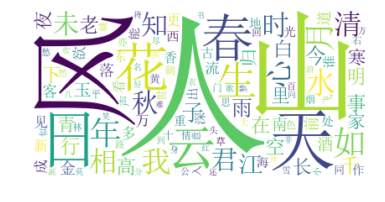

In [10]:
show_wordcloud(" ".join(text),"全局",print_count=200,type="one")

## 各朝代高频词云

-------------------- 先秦 --------------------
[('子', 1682), ('我', 1477), ('人', 1301), ('曰', 1072), ('君', 1012), ('王', 981), ('天', 768), ('如', 709), ('矣', 682), ('心', 671), ('彼', 652), ('既', 605), ('言', 547), ('大', 539), ('尔', 528), ('维', 524), ('下', 507), ('将', 486), ('吾', 479), ('公', 473), ('在', 471), ('知', 457), ('国', 454), ('夫', 451), ('行', 439), ('民', 431), ('日', 396), ('思', 374), ('归', 363), ('方', 347)]


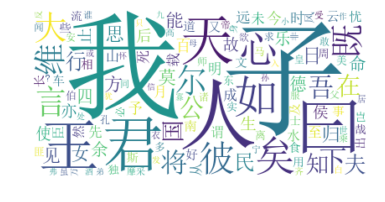

-------------------- 汉 --------------------
[('人', 1020), ('子', 963), ('王', 791), ('天', 706), ('下', 689), ('曰', 632), ('我', 580), ('心', 518), ('相', 495), ('公', 479), ('大', 465), ('日', 453), ('生', 440), ('行', 439), ('时', 432), ('故', 430), ('长', 422), ('如', 403), ('能', 401), ('君', 398), ('夫', 392), ('将', 373), ('欲', 367), ('言', 366), ('知', 366), ('余', 356), ('臣', 350), ('风', 343), ('后', 339), ('秦', 338)]


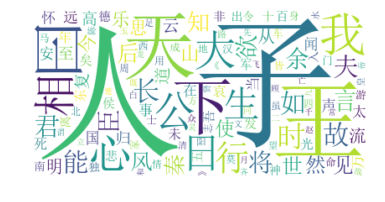

-------------------- 魏晋 --------------------
[('我', 1674), ('人', 1592), ('天', 1312), ('风', 1225), ('子', 1061), ('时', 1043), ('云', 1010), ('日', 987), ('生', 965), ('心', 921), ('在', 909), ('长', 900), ('清', 884), ('言', 829), ('如', 825), ('相', 810), ('明', 803), ('山', 795), ('游', 756), ('思', 738), ('高', 732), ('流', 724), ('飞', 706), ('神', 646), ('下', 639), ('行', 634), ('朝', 628), ('德', 628), ('世', 620), ('君', 618)]


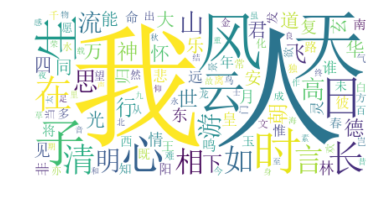

-------------------- 隋 --------------------
[('天', 585), ('风', 526), ('人', 449), ('云', 413), ('道', 406), ('长', 374), ('日', 367), ('时', 367), ('生', 342), ('神', 335), ('明', 331), ('我', 316), ('山', 315), ('流', 293), ('花', 290), ('金', 287), ('月', 279), ('飞', 273), ('德', 266), ('光', 266), ('心', 265), ('玉', 262), ('万', 261), ('相', 259), ('水', 259), ('大', 251), ('子', 248), ('灵', 247), ('行', 246), ('高', 240)]


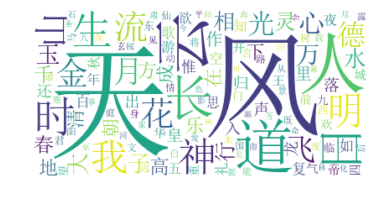

-------------------- 唐 --------------------
[('人', 67801), ('山', 50583), ('日', 46971), ('天', 39213), ('花', 35021), ('水', 34494), ('月', 34173), ('春', 33995), ('风', 31406), ('相', 30999), ('生', 30992), ('年', 30206), ('心', 29776), ('云', 28995), ('君', 28884), ('如', 28439), ('知', 28030), ('白', 26640), ('行', 25211), ('秋', 24698), ('下', 23840), ('清', 23812), ('在', 23715), ('时', 23478), ('空', 23472), ('夜', 23048), ('江', 22871), ('高', 22793), ('未', 22034), ('明', 21938)]


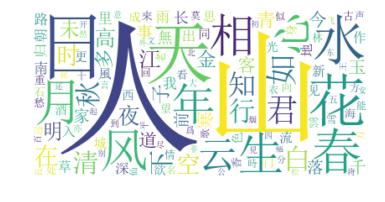

-------------------- 五代 --------------------
[('风', 57), ('花', 57), ('春', 57), ('香', 46), ('人', 45), ('红', 39), ('玉', 36), ('梦', 35), ('金', 35), ('月', 33), ('愁', 32), ('日', 29), ('烟', 29), ('水', 26), ('双', 26), ('雨', 25), ('山', 25), ('相', 24), ('恨', 24), ('帘', 24), ('长', 23), ('空', 23), ('落', 22), ('满', 22), ('情', 22), ('绿', 22), ('轻', 22), ('楼', 21), ('归', 21), ('心', 21)]


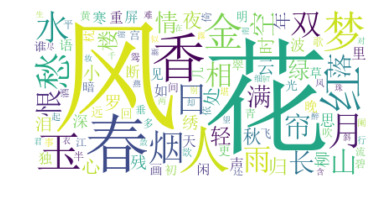

-------------------- 宋 --------------------
[('人', 277848), ('山', 205316), ('天', 165638), ('日', 153756), ('如', 140907), ('风', 139383), ('花', 136915), ('春', 135798), ('生', 132915), ('年', 132023), ('月', 117380), ('知', 116610), ('我', 112993), ('水', 111361), ('未', 110223), ('相', 107742), ('清', 106448), ('心', 101446), ('老', 100838), ('子', 96203), ('今', 95443), ('君', 95293), ('事', 94862), ('云', 93352), ('雨', 90326), ('無', 90119), ('行', 88448), ('千', 86637), ('江', 85909), ('时', 83833)]


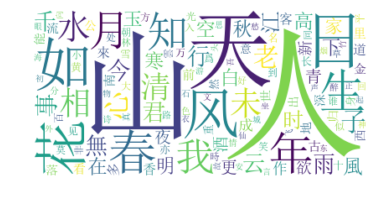

-------------------- 辽 --------------------
[('吟', 13), ('君', 11), ('待', 10), ('当', 7), ('深', 7), ('心', 6), ('天', 6), ('犹', 5), ('香', 5), ('王', 5), ('子', 5), ('作', 4), ('万', 4), ('铺', 4), ('妾', 4), ('相', 4), ('智', 4), ('四', 3), ('岁', 3), ('面', 3), ('北', 3), ('金', 3), ('风', 3), ('时', 3), ('世', 3), ('能', 3), ('那', 3), ('云', 3), ('知', 3), ('枕', 3)]


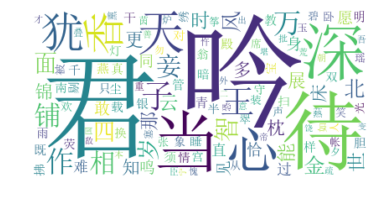

-------------------- 金 --------------------
[('人', 3585), ('山', 3078), ('风', 3012), ('天', 1958), ('云', 1842), ('日', 1803), ('年', 1797), ('花', 1710), ('春', 1674), ('生', 1554), ('时', 1533), ('月', 1481), ('如', 1476), ('水', 1274), ('老', 1267), ('秋', 1184), ('归', 1135), ('相', 1118), ('未', 1099), ('酒', 1094), ('知', 1089), ('见', 1087), ('事', 1086), ('里', 1085), ('心', 1077), ('长', 1071), ('我', 1051), ('青', 1038), ('清', 1023), ('谁', 1017)]


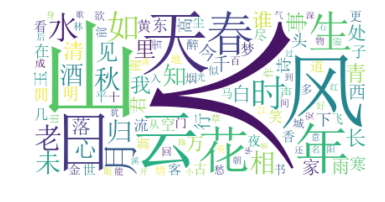

-------------------- 元 --------------------
[('人', 50180), ('我', 44808), ('云', 31856), ('风', 31682), ('山', 29776), ('你', 28566), ('日', 27487), ('天', 27223), ('生', 24478), ('花', 23021), ('了', 21951), ('如', 21669), ('儿', 20568), ('子', 19709), ('里', 19071), ('这', 18993), ('月', 18932), ('家', 18697), ('春', 18517), ('下', 18129), ('时', 18036), ('水', 17939), ('相', 17473), ('在', 17253), ('他', 17055), ('今', 16736), ('年', 16735), ('心', 16450), ('道', 16445), ('老', 16123)]


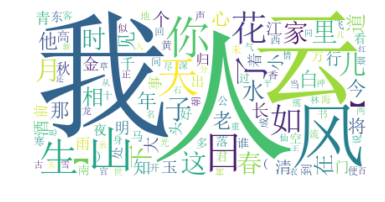

-------------------- 明 --------------------
[('人', 123423), ('风', 110781), ('山', 110557), ('云', 94699), ('日', 89748), ('天', 89505), ('花', 77174), ('春', 69230), ('月', 68716), ('水', 65249), ('年', 62786), ('时', 58771), ('生', 58763), ('白', 57313), ('长', 56040), ('如', 54302), ('江', 53229), ('秋', 52721), ('相', 51784), ('君', 51750), ('心', 51280), ('清', 47797), ('青', 47487), ('高', 47168), ('千', 46446), ('雨', 45594), ('知', 45131), ('子', 44812), ('里', 44432), ('归', 43059)]


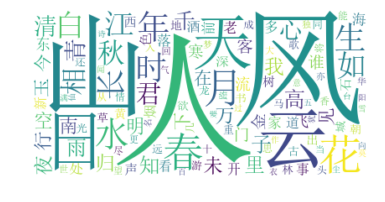

-------------------- 清 --------------------
[('人', 52893), ('风', 46686), ('山', 40951), ('花', 36386), ('天', 36310), ('云', 30451), ('日', 27338), ('春', 27209), ('如', 26024), ('月', 25612), ('年', 25429), ('水', 25296), ('生', 24995), ('时', 22697), ('秋', 21979), ('心', 21142), ('雨', 20561), ('我', 19101), ('相', 18747), ('江', 18705), ('长', 18113), ('声', 17957), ('清', 17804), ('空', 17770), ('里', 16960), ('寒', 16732), ('烟', 16704), ('未', 16454), ('夜', 16281), ('千', 16273)]


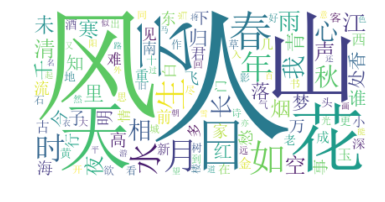

-------------------- 民国 --------------------
[('人', 10854), ('风', 9209), ('花', 8238), ('天', 7479), ('山', 7244), ('春', 6514), ('年', 6268), ('日', 5046), ('如', 4847), ('云', 4836), ('时', 4778), ('心', 4747), ('生', 4745), ('月', 4635), ('水', 4518), ('秋', 4330), ('江', 4188), ('梦', 4167), ('相', 3957), ('红', 3925), ('雨', 3683), ('未', 3526), ('我', 3511), ('寒', 3458), ('香', 3448), ('愁', 3305), ('谁', 3276), ('事', 3253), ('夜', 3191), ('归', 3188)]


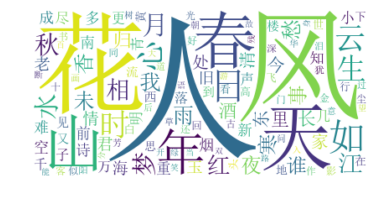

-------------------- 近代 --------------------
[('人', 16821), ('风', 16043), ('山', 12951), ('天', 12917), ('花', 12011), ('春', 10770), ('年', 10004), ('云', 8958), ('如', 8328), ('心', 8245), ('日', 8229), ('生', 8185), ('月', 7885), ('梦', 7715), ('水', 7669), ('时', 7325), ('秋', 7093), ('江', 7029), ('相', 6767), ('雨', 6745), ('长', 6200), ('未', 6011), ('情', 5764), ('红', 5761), ('谁', 5742), ('万', 5666), ('千', 5545), ('声', 5539), ('我', 5522), ('事', 5504)]


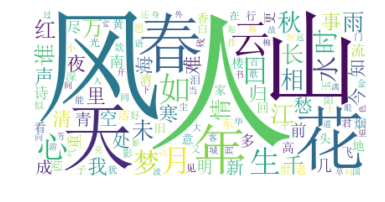

-------------------- 当代 --------------------
[('人', 15306), ('风', 14213), ('天', 11386), ('山', 10326), ('花', 9667), ('心', 8898), ('如', 8786), ('春', 8473), ('生', 8416), ('云', 8410), ('年', 8183), ('梦', 7871), ('我', 7772), ('月', 7125), ('水', 7062), ('日', 6978), ('时', 6869), ('雨', 6341), ('相', 5926), ('谁', 5804), ('千', 5760), ('清', 5419), ('长', 5413), ('秋', 5393), ('夜', 5346), ('未', 5079), ('情', 4975), ('空', 4891), ('红', 4815), ('青', 4749)]


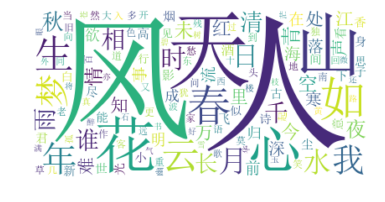

-------------------- 未知 --------------------


In [11]:
for dynasty in dynastys:
    poem_str = "".join(data_df.loc[data_df['朝代'] ==dynasty, ['内容']]["内容"].values)
    poem_str = " ".join([w for w in poem_str if w not in stopwords])
    print("--"*10,dynasty,"--"*10)
    if poem_str:
        show_wordcloud(poem_str,dynasty,print_count=30,type="one")

# 双字词共现
https://www.pydoc.io/pypi/gensim-3.2.0/autoapi/models/phrases/index.html

In [12]:
import re


def generate_ngrams(s, n=2):
    # s = s.lower()
    # s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    s = re.sub(r"[^\u4e00-\u9fa5]", " ", s)
    tokens = []
    for s in s.split(" "):
        _tokens = [token for token in s if token != ""]
        tokens.extend(_tokens)
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["".join(ngram) for ngram in ngrams]

## 全局双字词 

[('不知', 37364), ('千里', 32308), ('何处', 32306), ('万里', 30415), ('不可', 29612), ('春风', 27156), ('今日', 25966), ('人间', 25939), ('平生', 25922), ('十年', 25544), ('明月', 25187), ('不见', 23911), ('青山', 22002), ('故人', 21313), ('东风', 21280), ('风吹', 20461), ('白云', 20250), ('梅花', 19665), ('江南', 19511), ('回首', 19474), ('天地', 19200), ('百年', 18923), ('风雨', 18668), ('归来', 18618), ('如何', 18010), ('相逢', 17836), ('天涯', 17218), ('秋风', 17066), ('西风', 16868), ('不得', 16341), ('相思', 16219), ('悠悠', 16164), ('先生', 16110), ('天下', 15932), ('无人', 15930), ('流水', 15738), ('风流', 15578), ('人生', 15192), ('人不', 15171), ('何人', 15070), ('日月', 14848), ('如此', 14835), ('乾坤', 14701), ('山中', 14500), ('不是', 14476), ('当年', 14382), ('年年', 14111), ('文章', 13930), ('江湖', 13915), ('桃花', 13886), ('不能', 13746), ('不如', 13532), ('何如', 13400), ('寂寞', 13391), ('一笑', 13164), ('天上', 13144), ('可怜', 13118), ('黄金', 12955), ('何事', 12797), ('千古', 12753), ('芙蓉', 12666), ('白日', 12378), ('少年', 12370), ('安得', 12262), ('夕阳', 12139), ('江上', 12135), ('千年', 12

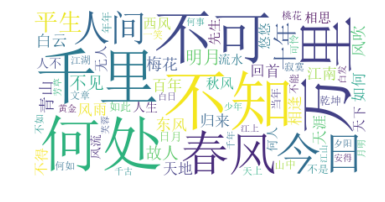

In [13]:
show_wordcloud(" ".join(generate_ngrams(text,n=2)),"全局",print_count=200,type="two")

## 各朝代双字词

-------------------- 先秦 --------------------
[('君子', 430), ('天下', 151), ('子曰', 109), ('我心', 97), ('诸侯', 91), ('文王', 85), ('王曰', 84), ('寡人', 80), ('四方', 80), ('对曰', 77), ('兄弟', 76), ('天子', 73), ('心忧', 72), ('先王', 68), ('父母', 64), ('见君', 64), ('忧心', 59), ('四牡', 56), ('昊天', 55), ('大夫', 54), ('曰吾', 51), ('忧矣', 49), ('公子', 48), ('左右', 48), ('魂归', 45), ('日月', 44), ('既见', 44), ('吾将', 44), ('美人', 43), ('圣人', 42)]


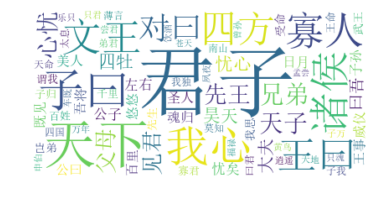

-------------------- 汉 --------------------
[('公子', 239), ('天下', 222), ('将军', 96), ('诸侯', 78), ('天子', 74), ('太子', 62), ('秦王', 59), ('相如', 55), ('千里', 51), ('然后', 51), ('日月', 51), ('左右', 49), ('陛下', 49), ('王曰', 49), ('今日', 47), ('项王', 47), ('侯生', 47), ('大夫', 45), ('沛公', 45), ('子曰', 44), ('哀乐', 42), ('赵王', 41), ('天地', 40), ('阿母', 40), ('群臣', 39), ('四海', 37), ('浮云', 37), ('君子', 37), ('春秋', 36), ('魏王', 36)]


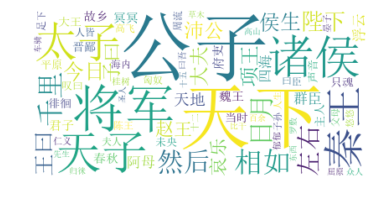

-------------------- 魏晋 --------------------
[('日月', 151), ('君子', 142), ('天下', 132), ('悠悠', 130), ('逍遥', 117), ('徘徊', 115), ('四海', 113), ('翩翩', 106), ('天地', 105), ('万里', 98), ('人生', 97), ('佳人', 94), ('我心', 90), ('慷慨', 86), ('明月', 84), ('白日', 83), ('千里', 80), ('谁能', 78), ('穆穆', 73), ('清风', 73), ('俯仰', 70), ('随风', 66), ('千载', 65), ('浮云', 64), ('明明', 59), ('日夕', 54), ('古人', 53), ('我皇', 53), ('万国', 51), ('青云', 51)]


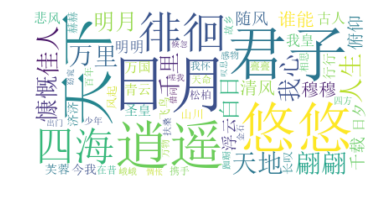

-------------------- 隋 --------------------
[('千里', 55), ('万里', 45), ('天地', 41), ('万国', 35), ('变时', 32), ('芙蓉', 31), ('明月', 29), ('流水', 27), ('相思', 26), ('风云', 26), ('长安', 24), ('天下', 23), ('天子', 23), ('肃肃', 23), ('谁能', 22), ('杨柳', 22), ('悠悠', 22), ('时生', 22), ('生在', 22), ('春风', 21), ('日月', 21), ('白云', 20), ('徘徊', 19), ('浮云', 19), ('秋风', 19), ('参差', 19), ('四海', 19), ('山川', 19), ('风吹', 18), ('礼乐', 18)]


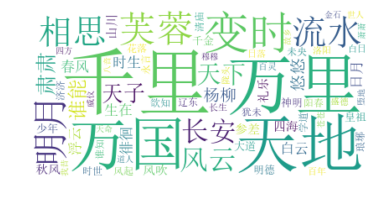

-------------------- 唐 --------------------
[('千里', 3998), ('今日', 3645), ('万里', 2857), ('明月', 2808), ('故人', 2330), ('悠悠', 2299), ('春风', 2278), ('白云', 2274), ('十年', 2248), ('相思', 2208), ('白日', 2180), ('青山', 2051), ('少年', 1940), ('天地', 1928), ('相逢', 1897), ('人间', 1889), ('平生', 1877), ('天子', 1856), ('年年', 1811), ('寂寞', 1740), ('日月', 1730), ('流水', 1721), ('风吹', 1719), ('天下', 1666), ('主人', 1619), ('月明', 1599), ('惆怅', 1598), ('今朝', 1568), ('萬里', 1552), ('行人', 1545)]


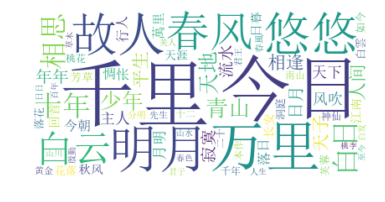

-------------------- 五代 --------------------
[('鸳鸯', 9), ('落花', 7), ('思量', 6), ('芳草', 6), ('昨夜', 5), ('惆怅', 5), ('依旧', 5), ('罗衣', 5), ('藕花', 5), ('玉楼', 5), ('往事', 4), ('笙歌', 4), ('流水', 4), ('酒醒', 4), ('春愁', 4), ('炉香', 4), ('双飞', 4), ('回首', 4), ('翠蛾', 4), ('风轻', 4), ('花间', 4), ('双双', 4), ('年年', 4), ('梧桐', 4), ('相逢', 4), ('多少', 4), ('红杏', 4), ('相见', 4), ('人间', 4), ('梦魂', 4)]


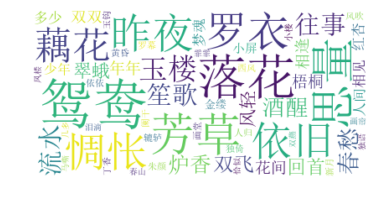

-------------------- 宋 --------------------
[('平生', 14589), ('千里', 13887), ('十年', 11143), ('春风', 10184), ('人间', 9933), ('今日', 9903), ('梅花', 9892), ('故人', 9217), ('明月', 9132), ('万里', 8768), ('天地', 8252), ('百年', 8190), ('相逢', 8059), ('江南', 7993), ('先生', 7927), ('天下', 7880), ('回首', 7636), ('人生', 7615), ('青山', 7473), ('江湖', 7360), ('东风', 7334), ('功名', 7325), ('日月', 6473), ('千古', 6367), ('风吹', 6215), ('风流', 6148), ('春風', 6144), ('悠悠', 6110), ('乾坤', 6072), ('文章', 6045)]


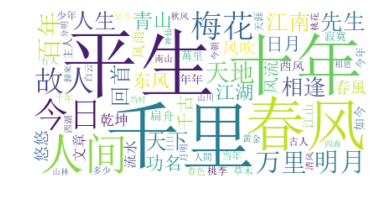

-------------------- 辽 --------------------
[('待君', 10), ('天子', 3), ('扫深', 2), ('深殿', 2), ('换香', 2), ('香枕', 2), ('剔银', 2), ('银灯', 2), ('拂象', 2), ('象床', 2), ('铺翠', 2), ('翠被', 2), ('装绣', 2), ('绣帐', 2), ('张鸣', 2), ('鸣筝', 2), ('展瑶', 2), ('瑶席', 2), ('叠锦', 2), ('锦茵', 2), ('爇熏', 2), ('熏炉', 2), ('愧荒', 2), ('荒疏', 2), ('疏敢', 2), ('敢吟', 2), ('吟吟', 2), ('吟恐', 2), ('恐忤', 2), ('忤帝', 2)]


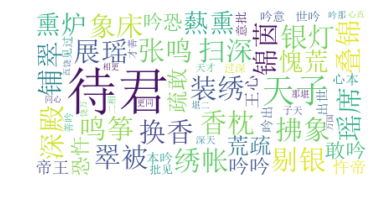

-------------------- 金 --------------------
[('春风', 311), ('万里', 218), ('青山', 202), ('千里', 192), ('人间', 190), ('平生', 183), ('风流', 168), ('东风', 165), ('西风', 162), ('百年', 160), ('十年', 158), ('风吹', 145), ('秋风', 142), ('功名', 140), ('回首', 137), ('明月', 137), ('白发', 132), ('今日', 131), ('落日', 128), ('人生', 124), ('人閒', 124), ('悠悠', 122), ('万古', 119), ('风雨', 116), ('故人', 115), ('西山', 113), ('年年', 112), ('萧萧', 111), ('相逢', 109), ('长安', 109)]


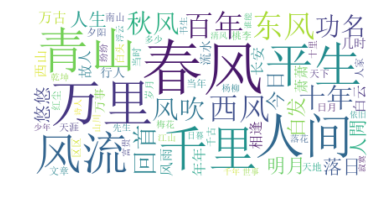

-------------------- 元 --------------------
[('今日', 4270), ('孩儿', 3981), ('甚么', 2993), ('哥哥', 2625), ('如今', 2541), ('那里', 2538), ('兄弟', 2349), ('春风', 2284), ('万里', 2174), ('白云', 2034), ('怎生', 1906), ('人间', 1835), ('正末', 1832), ('明月', 1781), ('将军', 1781), ('风吹', 1741), ('我这', 1734), ('青山', 1718), ('千里', 1699), ('两个', 1680), ('东风', 1639), ('先生', 1606), ('了我', 1597), ('十年', 1577), ('夫人', 1536), ('秋风', 1517), ('江南', 1486), ('西风', 1474), ('风雨', 1472), ('这里', 1464)]


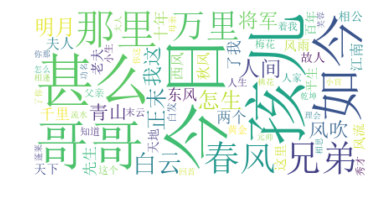

-------------------- 明 --------------------
[('万里', 10490), ('白云', 8137), ('千里', 7670), ('春风', 7303), ('青山', 7252), ('明月', 6960), ('十年', 6170), ('人间', 5930), ('风吹', 5927), ('秋风', 5258), ('风雨', 5137), ('故人', 5029), ('东风', 4961), ('百年', 4874), ('芙蓉', 4805), ('天地', 4703), ('梅花', 4665), ('今日', 4653), ('回首', 4594), ('乾坤', 4514), ('平生', 4387), ('悠悠', 4195), ('白日', 4176), ('流水', 4068), ('白发', 4058), ('天涯', 4019), ('当年', 3926), ('长安', 3904), ('西风', 3860), ('风流', 3846)]


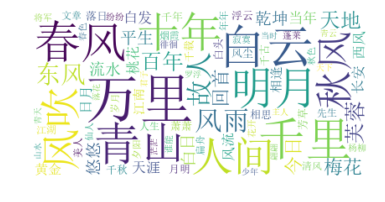

-------------------- 清 --------------------
[('万里', 3034), ('东风', 3001), ('天涯', 2975), ('风吹', 2721), ('西风', 2685), ('春风', 2489), ('千里', 2407), ('风雨', 2405), ('回首', 2326), ('夕阳', 2313), ('十年', 2305), ('人间', 2250), ('明月', 2249), ('江南', 2207), ('相思', 2109), ('斜阳', 2059), ('当年', 1997), ('秋风', 1933), ('白云', 1755), ('梅花', 1740), ('青山', 1727), ('桃花', 1686), ('今日', 1684), ('多少', 1651), ('百年', 1613), ('故人', 1599), ('平生', 1562), ('风流', 1553), ('年年', 1497), ('茫茫', 1472)]


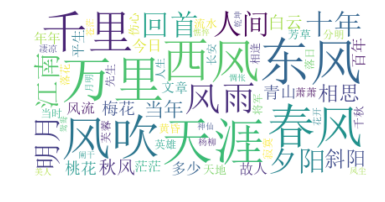

-------------------- 民国 --------------------
[('东风', 1028), ('天涯', 758), ('相思', 616), ('江南', 606), ('人间', 603), ('西风', 595), ('十年', 581), ('斜阳', 503), ('风吹', 500), ('回首', 434), ('夕阳', 424), ('风雨', 421), ('万里', 417), ('桃花', 401), ('春风', 396), ('年年', 385), ('千里', 373), ('风流', 369), ('当年', 368), ('梅花', 362), ('相逢', 358), ('多少', 353), ('黄昏', 352), ('今日', 344), ('沧桑', 338), ('文章', 332), ('江山', 327), ('百年', 314), ('故人', 312), ('阑干', 306)]


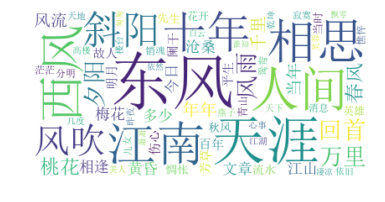

-------------------- 近代 --------------------
[('天涯', 1411), ('人间', 1346), ('风雨', 1218), ('相思', 1161), ('东风', 1134), ('江南', 1088), ('万里', 1039), ('十年', 970), ('斜阳', 954), ('西风', 924), ('回首', 817), ('春风', 817), ('当年', 816), ('夕阳', 806), ('风吹', 730), ('千里', 714), ('多少', 705), ('平生', 699), ('年年', 697), ('江山', 696), ('明月', 684), ('今日', 669), ('风流', 649), ('相逢', 604), ('青山', 590), ('秋风', 589), ('梅花', 571), ('文章', 557), ('百年', 546), ('故人', 536)]


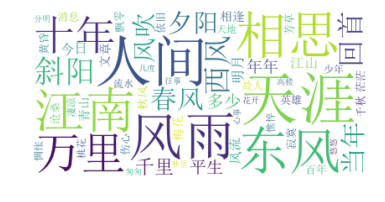

-------------------- 当代 --------------------
[('人间', 1452), ('天涯', 846), ('风雨', 807), ('万里', 800), ('春风', 790), ('相思', 787), ('十年', 699), ('千里', 683), ('茫茫', 681), ('明月', 675), ('东风', 655), ('当时', 625), ('当年', 624), ('天地', 606), ('风吹', 591), ('百年', 562), ('千年', 555), ('江南', 555), ('斜阳', 532), ('秋风', 531), ('回首', 523), ('平生', 520), ('年年', 509), ('西风', 509), ('青山', 506), ('梦里', 504), ('寂寞', 504), ('白云', 489), ('相逢', 485), ('依旧', 479)]


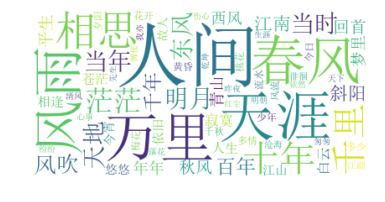

-------------------- 未知 --------------------


In [14]:
for dynasty in dynastys:
    poem_str = "".join(data_df.loc[data_df['朝代'] ==dynasty, ['内容']]["内容"].values)
    poem_str = "".join([w for w in poem_str if w not in stopwords])
    poem_str = " ".join(generate_ngrams(poem_str))
    print("--"*10,dynasty,"--"*10)
    if poem_str:
        show_wordcloud(poem_str,dynasty,print_count=30,type="two")

# 词向量训练

In [21]:
text2 = "\n".join([" ".join(poem) for poem in data_df["内容"].values])
train_path = os.path.join(data_dir, "train.txt")
with open(train_path, "w", encoding="utf-8") as f:
    f.write(text2)#每行一首诗，使用空格分隔开每个字

In [22]:
del text2

In [23]:
from gensim.models import word2vec
def train(file_path,dynasty="全部"):
    # 加载语料
    sentences = word2vec.Text8Corpus(file_path)
    # 训练模型
    print(file_path)
    model = word2vec.Word2Vec(sentences)
    # 保存模型
    model_name = os.path.basename(file_path).split(".")[0]
    model.save('{}/{}.model'.format(dynasty,model_name))
    # 选出最相似的10个词
    for e in model.most_similar(positive=['春'], topn=10):
        print(e[0], e[1])
    return model

In [24]:
train(train_path)

./data\train.txt
秋 0.5799683332443237
花 0.5625013709068298
勻 0.5230087637901306
梅 0.5053828954696655
晴 0.47886985540390015
嬌 0.46971264481544495
芳 0.46330001950263977
迟 0.46208667755126953
濃 0.44848769903182983
、 0.447100967168808


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if sys.path[0] == '':


In [28]:
model = word2vec.Word2Vec.load('train.model')
for word in ["春", '思', "梅", "冬"]:
    res = model.most_similar(positive=[word], topn=10)
    print(word)
    print(res)
    print("-" * 10)

春
[('秋', 0.5799683332443237), ('花', 0.5625013709068298), ('勻', 0.5230087637901306), ('梅', 0.5053828954696655), ('晴', 0.47886985540390015), ('嬌', 0.46971264481544495), ('芳', 0.46330001950263977), ('迟', 0.46208667755126953), ('濃', 0.44848769903182983), ('、', 0.447100967168808)]
----------
思
[('怀', 0.576126217842102), ('懷', 0.5410664677619934), ('念', 0.4699159860610962), ('逢', 0.46386995911598206), ('情', 0.45409923791885376), ('悽', 0.45010948181152344), ('愁', 0.4474819302558899), ('忆', 0.44689685106277466), ('肠', 0.4421135485172272), ('忖', 0.4412771761417389)]
----------
梅
[('梨', 0.6117854118347168), ('桃', 0.5957249402999878), ('楝', 0.5816620588302612), ('栀', 0.5537449717521667), ('杏', 0.5452044010162354), ('蘆', 0.5304984450340271), ('枝', 0.523170530796051), ('酴', 0.5137252807617188), ('榴', 0.5064886808395386), ('花', 0.5062466859817505)]
----------
冬
[('腊', 0.5554414987564087), ('夏', 0.5533274412155151), ('臘', 0.5242142677307129), ('閏', 0.5084278583526611), ('冱', 0.5013903379440308), ('暄'

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
data_df["内容"][0]

'云髻高梳鬓不分，扫除虚室事元君。新糊白纸屏风上，尽画蓬莱五色云。'

In [62]:
#获取model里面的说有关键词
keys=model.wv.vocab.keys()

#获取词对于的词向量
wordvector=[]
for key in keys:
    wordvector.append(model[key])

#分类
classCount=10
clf = KMeans(n_clusters=classCount)
s = clf.fit(wordvector)
print(s)
#获取到所有词向量所属类别
labels=clf.labels_
keys=list(keys)
#把是一类的放入到一个集合
from collections import defaultdict
classCollects=defaultdict(list)
for i in range(len(keys)):
    classCollects[labels[i]].append(keys[i])

print(classCollects)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
defaultdict(<class 'list'>, {4: ['云', '梳', '分', '新', '糊', '屏', '风', '蓬', '摇', '光', '凉', '松', '阴', '回', '廊', '僧', '香', '愁', '青', '华', '晴', '开', '衣', '幽', '声', '斜', '阳', '寒', '栖', '楼', '阑', '吹', '灯', '窗', '红', '春', '宫', '花', '纱', '裁', '双', '迟', '台', '丹', '莺', '啼', '清', '浓', '歌', '穿', '衫', '钩', '残', '梢', '边', '星', '篱', '惊', '眠', '扶', '前', '明', '看', '金', '泥', '笳', '凰', '袍', '银', '飞', '离', '梧', '桐', '秋', '空', '芳', '头', '苔', '深', '芙', '蓉', '帘', '垂', '笼', '尘', '韶', '稠', '凝', '兰', '鸳', '鸯', '烟', '、', '潇', '琼', '笺', '珠', '瑶', '轮', '弹', '琴', '莲', '林', '酡', '黄', '玲', '珑', '珂', '霞', '铜', '浑', '梅', '罗', '炉', '鸾', '翻', '棋', '团', '偏', '纨', '襟', '初', '篁', '琅', '玕', '微', '吟', '零', '霜', '魂', '装', '池', '移', '园', '雕', '禽', '擎', '衿', '迷', '依', '稀', '蟾', '孤', '嫦', '娥', '霓', '裳', '荷', '幢', '飘', '披', '萝', '钟', '迎', '挑', '闲',